In [21]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [22]:
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

X.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [23]:
# variable information 
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [24]:
X.columns = ['account_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 
         'savings', 'employment_since', 'installment_rate', 'sex', 'guarantors', 
         'residence_since', 'property', 'age', 'other_plans', 'housing', 
         'num_credits', 'job', 'num_people_maintenance', 'telephone', 'foreign_worker']
X.head()

,account_status,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,sex,guarantors,residence_since,property,age,other_plans,housing,num_credits,job,num_people_maintenance,telephone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


### Feature engineering

`account_status` : (qualitative)  - Status of existing checking account 
* A11 :      ... <    0 DM
* A12 : 0 <= ... <  200 DM
* A13 :      ... >= 200 DM / salary assignments for at least 1 year
* A14 : no checking account

In [25]:
# Regroup A12 and A13
mapping = {'A11': 'overdrawn',
           'A12': 'stable balance',
           'A13': 'stable balance',
           'A14': 'no account'}
X.loc[:, 'account_status'] = X['account_status'].replace(mapping)

`credit_history` :  (qualitative) 
* A30 : no credits taken/ all credits paid back duly
* A31 : all credits at this bank paid back duly
* A32 : existing credits paid back duly till now
* A33 : delay in paying off in the past
* A34 : critical account/  other credits existing (not at this bank)

In [26]:
# Regroup A30 and A31 into 'good', A33and A34 into 'bad'
mapping = {'A30': 'good',
           'A31': 'good',
           'A33': 'bad',
           'A34': 'bad',
           'A32': 'being repaid'}
X.loc[:, 'credit_history'] = X['credit_history'].replace(mapping)

`purpose` :  (qualitative) 
* A40 : car (new)
* A41 : car (used)
* A42 : furniture/equipment
* A43 : radio/television
* A44 : domestic appliances
* A45 : repairs
* A46 : education
* A47 : (vacation - does not exist?)
* A48 : retraining
* A49 : business
* A410 : others

In [27]:
# Regroup into 6 categories
mapping = {'A40': 'car',
            'A41': 'car',
            'A42': 'domestic equipment',
            'A43': 'domestic equipment',
            'A44': 'domestic equipment',
            'A45': 'others',
            'A46': 'education',
            'A48': 'education',
            'A49': 'business',
            'A410': 'others'
            }

X.loc[:, 'purpose'] = X['purpose'].replace(mapping)

`savings` :  (qualitative) -  Savings account/bonds
* A61 :          ... <  100 DM
* A62 :   100 <= ... <  500 DM
* A63 :   500 <= ... < 1000 DM
* A64 :          .. >= 1000 DM
* A65 :   unknown/ no savings account

In [28]:
# Regroup into 4 categories
mapping = {'A61': 'little',
           'A62': 'moderate',
           'A63': 'moderate',
           'A64': 'rich',
           'A65': 'NA'
            }

X.loc[:, 'savings'] = X['savings'].replace(mapping)

`employment_since` :  (qualitative) -   Present employment since
* A71 : unemployed
* A72 :       ... < 1 year
* A73 : 1  <= ... < 4 years  
* A74 : 4  <= ... < 7 years
* A75 :       .. >= 7 years

In [29]:
# Regroup into 3 categories
mapping = {'A71': 'unemployed',
           'A72': 'recent position',
           'A73': 'recent position',
           'A74': 'long-term position',
           'A75': 'long-term position'
            }

X.loc[:, 'employment_since'] = X['employment_since'].replace(mapping)

`sex` :  (qualitative)  -  Personal status and sex
* A91 : male   : divorced/separated
* A92 : female : divorced/separated/married
* A93 : male   : single
* A94 : male   : married/widowed
* A95 : female : single

In [30]:
# Regroup into 6 categories
mapping = { 'A91': 'male',
            'A93': 'male',
            'A94': 'male',
            'A92': 'female',
            'A95': 'female'
            }

X.loc[:, 'sex'] = X['sex'].replace(mapping)

`guarantors` : (qualitative)  -  Other debtors / guarantors
* A101 : none
* A102 : co-applicant
* A103 : guarantor

In [31]:
# categories didn't change but for better readability
mapping = {'A101': 'none',
           'A102': 'co-applicant',
           'A103': 'guarantor'
           }

X.loc[:, 'guarantors'] = X['guarantors'].replace(mapping)

`housing` : (qualitative) 
* A151 : rent
* A152 : own
* A153 : for free

In [32]:
# categories didn't change but for better readability
mapping = {'A151': 'rent',
           'A152': 'own',
           'A153': 'for free'
           }

X.loc[:, 'housing'] = X['housing'].replace(mapping)

`job` : (qualitative) 
* A171 : unemployed/ unskilled  - non-resident
* A172 : unskilled - resident
* A173 : skilled employee / official
* A174 : management/ self-employed/highly qualified employee/ officer

In [33]:
# Regroup into 2 categories
mapping = { 'A171': 'unskilled',
            'A172': 'unskilled',
            'A173': 'skilled',
            'A174': 'skilled'
            }

X.loc[:, 'job'] = X['job'].replace(mapping)

We drop attributes 8, 11, 12, 14, 19, 20

In [34]:
# Drop specified attributes
X = X.drop(['installment_rate', 'residence_since', 'property', 'other_plans', 'telephone', 'foreign_worker', 'guarantors'], axis=1)
# X = X.drop(['purpose'], axis=1)
X.head()

,account_status,duration,credit_history,purpose,credit_amount,savings,employment_since,sex,age,housing,num_credits,job,num_people_maintenance
0,overdrawn,6,bad,domestic equipment,1169,NA,long-term position,male,67,own,2,skilled,1
1,stable balance,48,being repaid,domestic equipment,5951,little,recent position,female,22,own,1,skilled,1
2,no account,12,bad,education,2096,little,long-term position,male,49,own,1,unskilled,2
3,overdrawn,42,being repaid,domestic equipment,7882,little,long-term position,male,45,for free,1,skilled,2
4,overdrawn,24,bad,car,4870,little,recent position,male,53,for free,2,skilled,2


### Data visualization

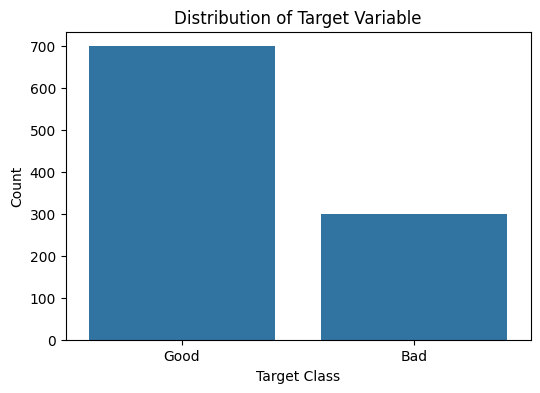

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x=pd.Series(np.ravel(y)))
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["Good", "Bad"])
plt.show()

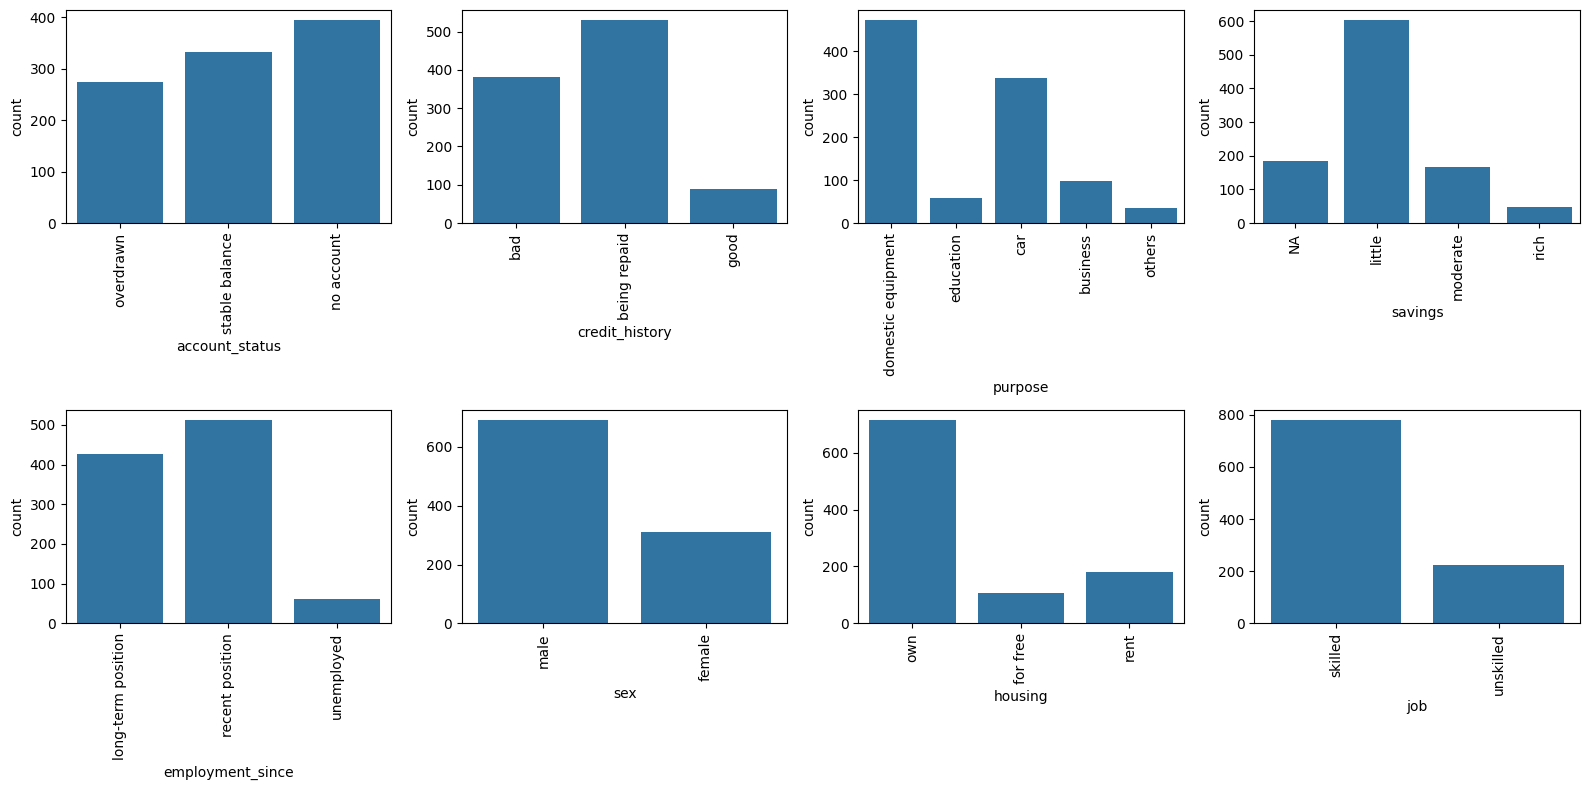

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()
cat_cols = ['account_status', 'credit_history', 'purpose', 'savings', 'employment_since', 'sex', 'housing','job']
for i, var in enumerate(cat_cols):
    sns.countplot(x=var, data=X, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90) 
plt.tight_layout()
plt.show()

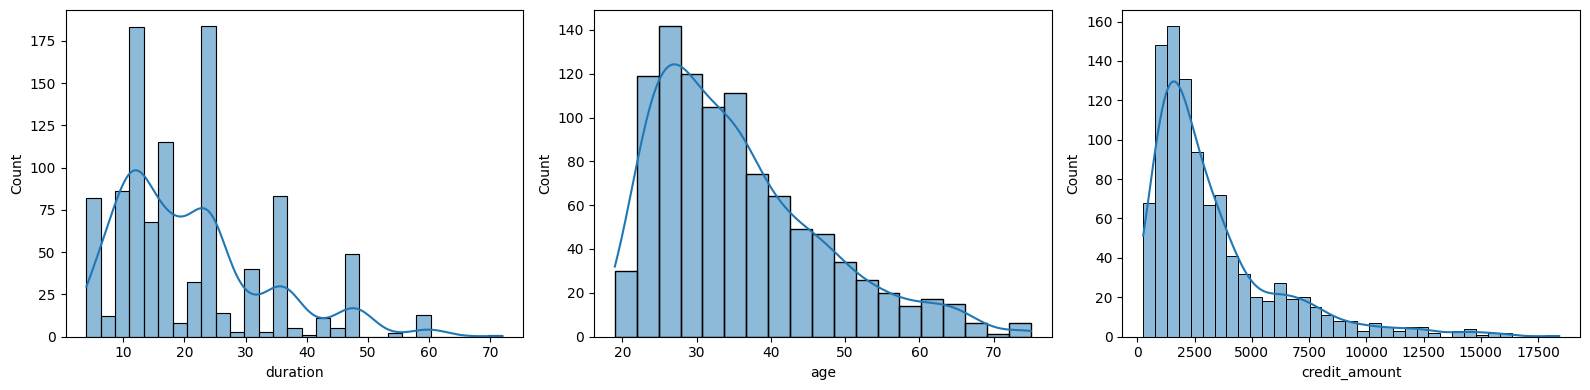

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
axes = axes.flatten()
cont_cols = ['duration', 'age', 'credit_amount']
for i, var in enumerate(cont_cols):
    sns.histplot(x=var, data=X, ax=axes[i], kde=True)
plt.tight_layout()
plt.show()

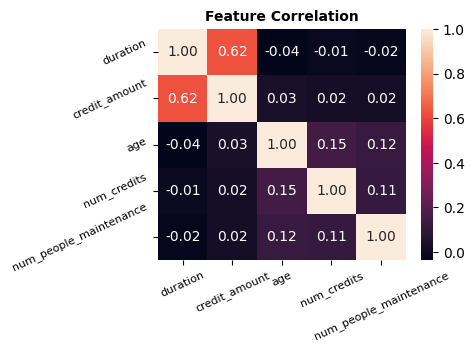

In [38]:
# Select only numeric columns
numeric_df = X.select_dtypes(include=['number'])

# Calculate correlations + plot heatmap
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation', fontsize=10, fontweight='bold')
plt.xticks(fontsize=8, rotation=25)
plt.yticks(fontsize=8, rotation=25)
plt.show()

#### Transform continuous variables to categorical

In [39]:
# Duration
category = pd.cut(X['duration'], bins=[0, 12, 24, 36, np.inf], labels=['0-12', '13-24', '25-36', '>36'])
X.insert(1, 'duration_cat', category)
X = X.drop(['duration'], axis=1)

In [40]:
# Age
category = pd.cut(X['age'], bins=[0, 25, 30, 35, 40, 50, np.inf], labels=['0-25', '26-30', '31-35', '36-40', '41-50', '>50'])
X.insert(9, 'age_group', category)
X = X.drop(['age'], axis=1)

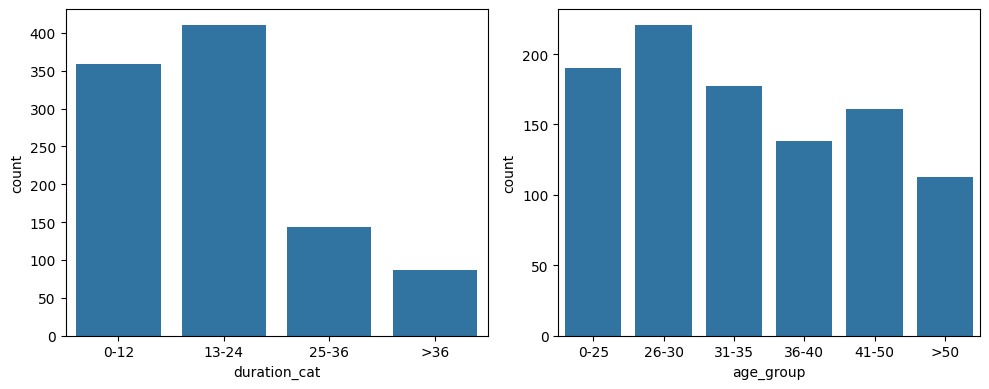

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes = axes.flatten()
cat_cols = ['duration_cat', 'age_group']
for i, var in enumerate(cat_cols):
    sns.countplot(x=var, data=X, ax=axes[i])
plt.tight_layout()
plt.show()

### Preprocessing

#### Encode categorical variables

In [42]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
# Ordinal variables 
X_encoded['account_status'] = X_encoded['account_status'].map({'overdrawn': 1, 'no account': 2, 'stable balance': 3})
X_encoded['credit_history'] = X_encoded['credit_history'].map({'bad': 1, 'being repaid': 2, 'good': 3})
X_encoded['savings'] = X_encoded['savings'].map({'NA': 1, 'little':2, 'moderate': 3, 'rich': 4})
X_encoded['employment_since'] = X_encoded['employment_since'].map({'unemployed': 1, 'recent position': 2, 'long-term position': 3})
X_encoded['job'] = X_encoded['job'].map({'unskilled': 1, 'skilled': 2})
X_encoded['duration_cat'] = X_encoded['duration_cat'].map({'0-12': 1, '13-24': 2, '25-36': 3, '>36': 4}).astype(int)
X_encoded['age_group'] = X_encoded['age_group'].map({'0-25': 1, '26-30': 2, '31-35': 3, '36-40': 4, '41-50': 5, '>50': 6}).astype(int)

# Binary Encoding for the Sex variable
label=LabelEncoder()
X_encoded['sex']=label.fit_transform(X_encoded['sex'])

# One-Hot Encoding for non-ordinal variables
X_encoded = pd.get_dummies(X_encoded, columns=['purpose', 'housing'], drop_first=True)

#### Split the dataset

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=123)

#### Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Modeling

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc

Cost matrix given (with the dataset)

In [46]:
# cost matrix (rows = true classes, columns = predicted classes)
cost_matrix = np.array([[0, 1],  # Cost for Good (1)
                        [5, 0]]) # Cost for Bad (2)

#### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the total cost of misclassification using the confusion matrix and cost matrix
total_cost = np.sum(conf_matrix * cost_matrix)
print("Total Cost of Misclassification:", total_cost)

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.77      0.79       139
           2       0.54      0.61      0.57        61

    accuracy                           0.72       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.73      0.72      0.72       200

Confusion Matrix:
 [[107  32]
 [ 24  37]]
Total Cost of Misclassification: 152


#### RandomForest

c:\Users\marie\OneDrive\Documents\cours\ensae\3A\advanced ML\Projet ML\.venvML\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.755
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.86      0.83       139
           2       0.62      0.52      0.57        61

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200

Confusion Matrix:
 [[119  20]
 [ 29  32]]
Total Cost of Misclassification: 165


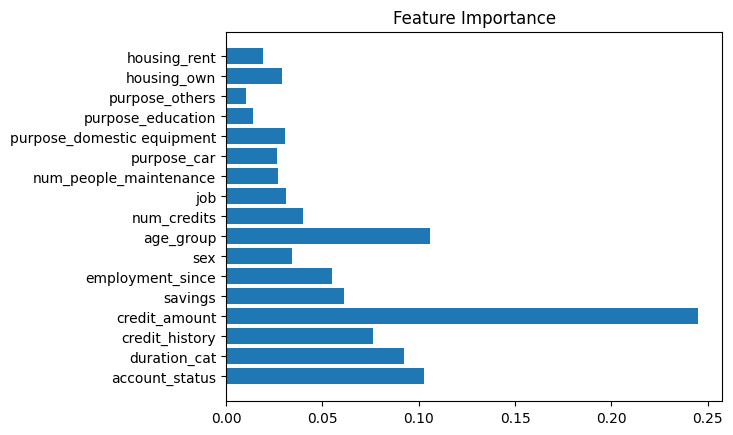

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=123) #, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the total cost of misclassification using the confusion matrix and cost matrix
total_cost = np.sum(conf_matrix * cost_matrix)

print("Total Cost of Misclassification:", total_cost)


# Get feature importances
feature_importances = rf.feature_importances_

# Plot feature importance
plt.barh(X_encoded.columns, feature_importances)
plt.title("Feature Importance")
plt.show()

With recursive feature elimination

In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=123)
selector = RFE(model, n_features_to_select=10)
X_train_rfe = selector.fit_transform(X_train, y_train)

# Train with selected features
model.fit(X_train_rfe, y_train)

# Transform the test data with the same selector
X_test_rfe = selector.transform(X_test)
y_pred = model.predict(X_test_rfe)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the total cost of misclassification using the confusion matrix and cost matrix
total_cost = np.sum(conf_matrix * cost_matrix)

print("Total Cost of Misclassification:", total_cost)

c:\Users\marie\OneDrive\Documents\cours\ensae\3A\advanced ML\Projet ML\.venvML\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\marie\OneDrive\Documents\cours\ensae\3A\advanced ML\Projet ML\.venvML\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\marie\OneDrive\Documents\cours\ensae\3A\advanced ML\Projet ML\.venvML\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\marie\OneDrive\Documents\

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.87      0.85       139
           2       0.66      0.57      0.61        61

    accuracy                           0.78       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.77      0.78      0.78       200

Confusion Matrix:
 [[121  18]
 [ 26  35]]
Total Cost of Misclassification: 148


try a grid search to improve classification accuracy :

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 4, 8],
#     }

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    }

# Create the Random Forest model
rf = RandomForestClassifier(random_state=123)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# Fit the Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Calculate misclassification cost
conf_matrix = confusion_matrix(y_test, y_pred)
total_cost = np.sum(conf_matrix * cost_matrix)
print("Total Cost of Misclassification:", total_cost)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\marie\OneDrive\Documents\cours\ensae\3A\advanced ML\Projet ML\.venvML\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.755
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.95      0.84       139
           2       0.73      0.31      0.44        61

    accuracy                           0.76       200
   macro avg       0.74      0.63      0.64       200
weighted avg       0.75      0.76      0.72       200

Total Cost of Misclassification: 217


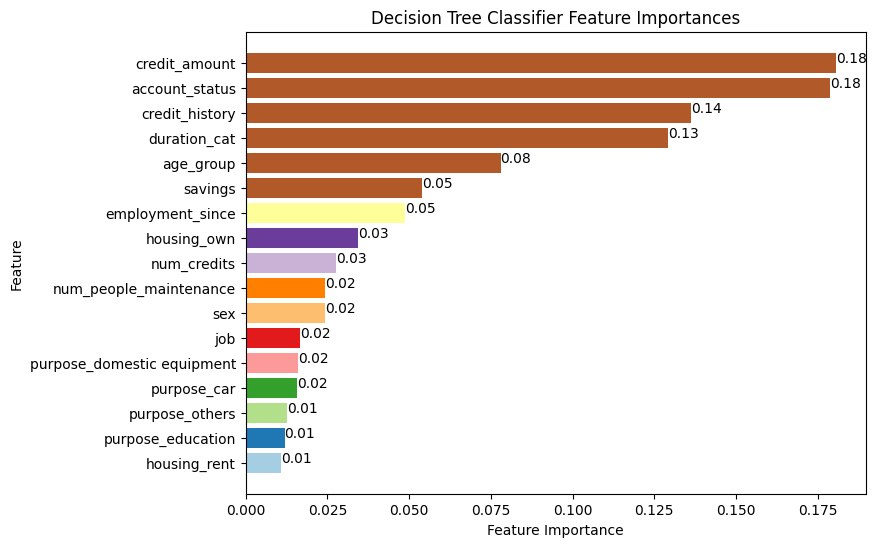

In [51]:
# Compute feature importances
importances = best_rf.feature_importances_
features = X_encoded.columns
# Sort the feature importances in descending order
importances_sorted = sorted(zip(features, importances), key=lambda x: x[1], reverse=False)
features_sorted = [f[0] for f in importances_sorted]
importances_sorted = [f[1] for f in importances_sorted]
# Define colors for the bars
colors = plt.cm.Paired(np.arange(len(importances)))
# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(features_sorted, importances_sorted, color=colors)
plt.xticks(rotation=0)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Classifier Feature Importances')
# Add the feature importance values to the bars
for i, v in enumerate(importances_sorted):
 plt.text(v, i, '{:.2f}'.format(v), color='black', fontsize=10, ha='left')
plt.show()

#### LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=123)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the total cost of misclassification using the confusion matrix and cost matrix
total_cost = np.sum(conf_matrix * cost_matrix)
print("Total Cost of Misclassification:", total_cost)

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.88      0.80       139
           2       0.52      0.28      0.36        61

    accuracy                           0.70       200
   macro avg       0.63      0.58      0.58       200
weighted avg       0.67      0.70      0.67       200

Confusion Matrix:
 [[123  16]
 [ 44  17]]
Total Cost of Misclassification: 236


c:\Users\marie\OneDrive\Documents\cours\ensae\3A\advanced ML\Projet ML\.venvML\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### XGBoost

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       139
           1       0.61      0.57      0.59        61

    accuracy                           0.76       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.76      0.76      0.76       200

Confusion Matrix:
 [[117  22]
 [ 26  35]]
Total Cost of Misclassification: 152


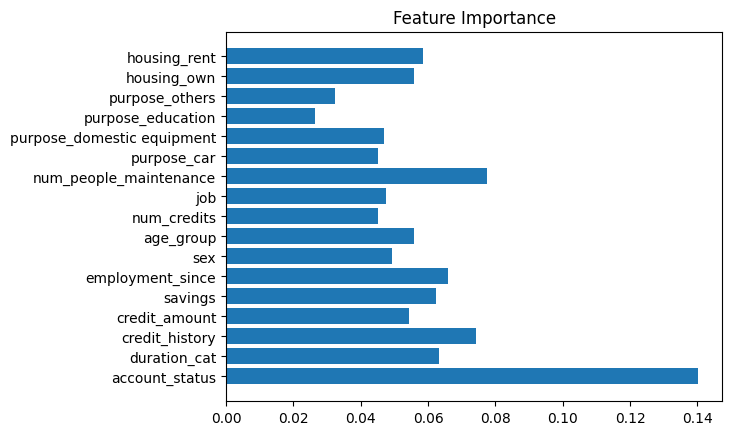

In [53]:
from xgboost import XGBClassifier

# Map target labels from [1, 2] to [0, 1]
y_train_xgboost = y_train.replace({1: 0, 2: 1})
y_test_xgboost = y_test.replace({1: 0, 2: 1})

xgb = XGBClassifier(random_state=123)
xgb.fit(X_train, y_train_xgboost)
y_pred = xgb.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test_xgboost, y_pred))
print("Classification Report:\n", classification_report(y_test_xgboost, y_pred))
conf_matrix = confusion_matrix(y_test_xgboost, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the total cost of misclassification using the confusion matrix and cost matrix
total_cost = np.sum(conf_matrix * cost_matrix)
print("Total Cost of Misclassification:", total_cost)

# Get feature importances
feature_importances = xgb.feature_importances_

# Plot feature importance
plt.barh(X_encoded.columns, feature_importances)
plt.title("Feature Importance")
plt.show()